In [17]:
import os
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from matplotlib.lines import Line2D

In [4]:
# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

In [5]:
figsave_dir = '../Documentation/report/img_src/'
figsave_format = 'pdf'
figsave_dpi = 150

data_dir = '../data/'
os.listdir(data_dir)

['1.dat_001',
 '2.dat_001',
 '3.dat_001',
 '4.dat',
 '4.int.4.dat',
 '4.int.bw.ps',
 '4.int.ps',
 '4.int0.ps',
 '4.sol',
 'béla.xlsx']

## Prepare measured data

In [77]:
dat_1 = np.genfromtxt(data_dir + '1.dat_001')
dat_2 = np.genfromtxt(data_dir + '2.dat_001')
dat_3 = np.genfromtxt(data_dir + '3.dat_001')
dat_4 = np.genfromtxt(data_dir + '4.dat')

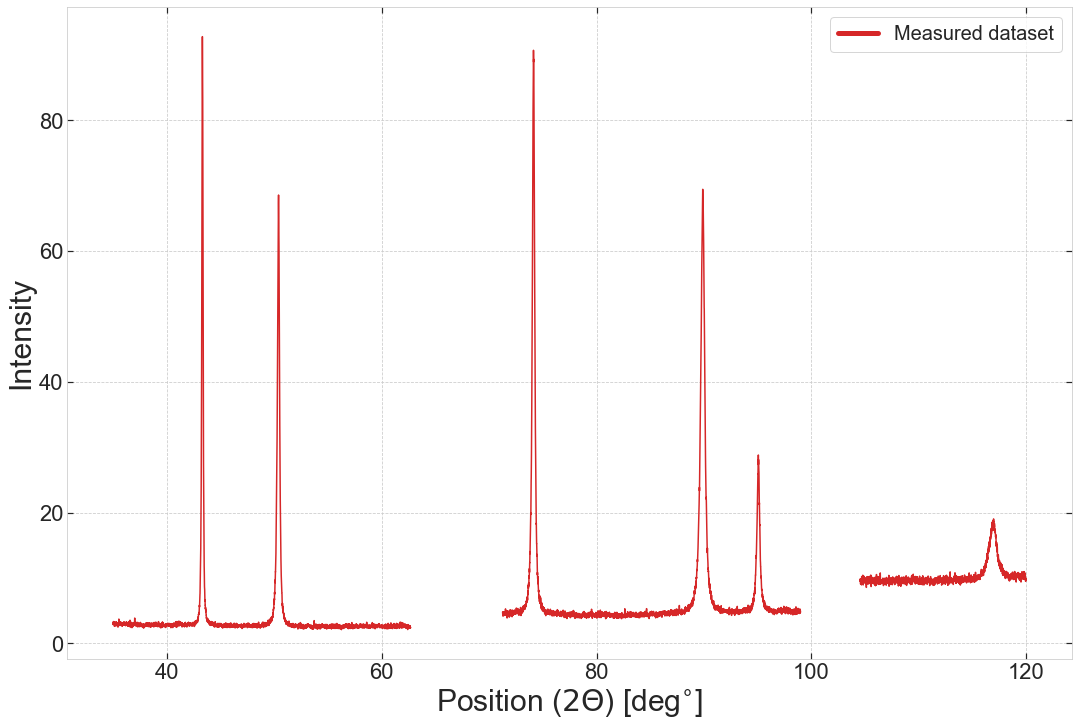

In [87]:
fig, axes = plt.subplots(figsize=(18,12))

axislabelsize = 30
axisticksize = 22
legendsize = 20

axes.plot(dat_1[:,0], dat_1[:,1],
          color='tab:red')
axes.plot(dat_2[:,0], dat_2[:,1],
          color='tab:red')
axes.plot(dat_3[:,0], dat_3[:,1],
          color='tab:red')

axes.set_xlabel('Position ($2 \Theta$) [deg$^{\circ}$]', fontsize=axislabelsize)#, fontweight='bold')
axes.set_ylabel('Intensity', fontsize=axislabelsize)#, fontweight='bold')

axes.tick_params(axis='both', which='major', labelsize=axisticksize)

handles = [Line2D([0], [0], color='tab:red', lw=5, label='Measured dataset')]
plt.legend(handles=handles, loc='upper right', fontsize=legendsize)

plt.savefig(figsave_dir +
            'measured_data.' + figsave_format,
            format=figsave_format,
            dpi=figsave_dpi)
plt.show()

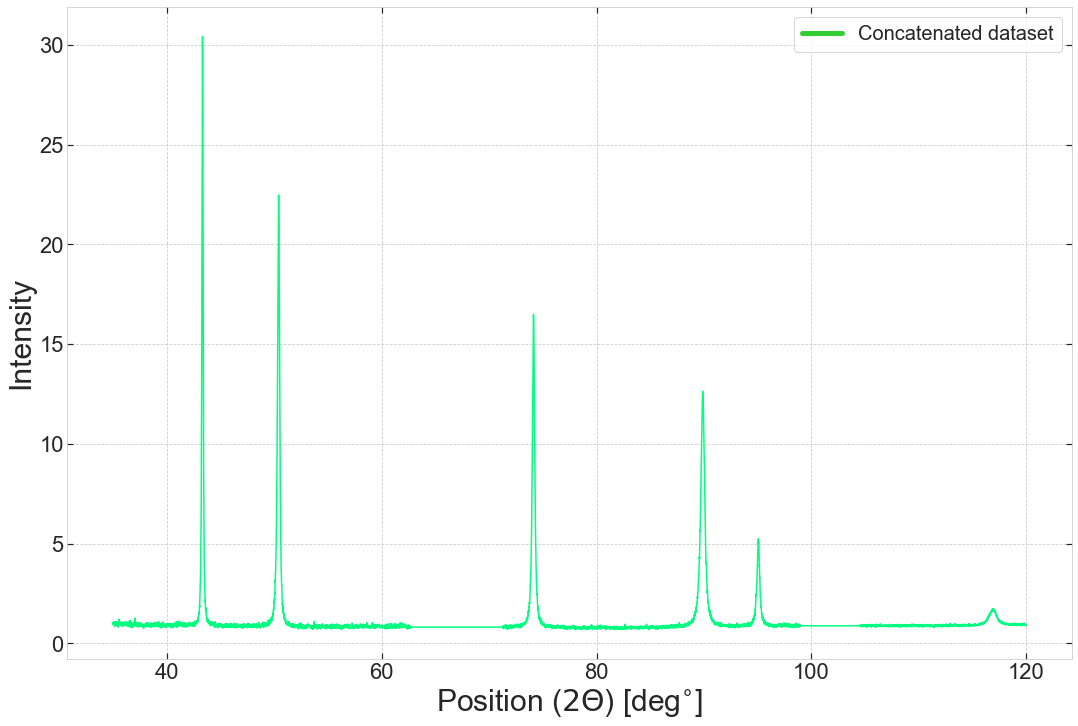

In [88]:
fig, axes = plt.subplots(figsize=(18,12))

axislabelsize = 30
axisticksize = 22
legendsize = 20

axes.plot(dat_4[:,0], dat_4[:,1],
          color='springgreen')

axes.set_xlabel('Position ($2 \Theta$) [deg$^{\circ}$]', fontsize=axislabelsize)#, fontweight='bold')
axes.set_ylabel('Intensity', fontsize=axislabelsize)#, fontweight='bold')

axes.tick_params(axis='both', which='major', labelsize=axisticksize)

handles = [Line2D([0], [0], color='limegreen', lw=5, label='Concatenated dataset')]
plt.legend(handles=handles, loc='upper right', fontsize=legendsize)

plt.savefig(figsave_dir +
            'prepared_data.' + figsave_format,
            format=figsave_format,
            dpi=figsave_dpi)
plt.show()

## Williamson-Hall method

### Calculating quantities for Williamson-Hall figures

In [10]:
def sum_of_squares(arr):
    return np.sum([i*i for i in arr])

In [62]:
# Constants
# 1. Wavelength of used x-ray
# lambda = 0.15406 nm
lmbda = 0.15406
# 2. Coefficients for dislocations
q_edge = 1.67
q_screw = 2.33
q_mixed = np.mean((q_edge, q_screw))
# 3. hkl indeces of lattice planes
hkl = np.array((
    (1,1,1),
    (2,0,0),
    (2,2,0),
    (3,1,1),
    (2,2,2),
    (4,0,0)
))
hkl_sqr = np.array([((v[0]**2*v[1]**2 + v[0]**2*v[2]**2 + v[1]**2*v[2]**2) /
                      sum_of_squares(v)**2) for v in hkl])
# 4. C_h00 values
Ch00_edge = 0.3076
Ch00_screw = 0.3029
Ch00_mixed = np.mean((Ch00_edge, Ch00_screw))

# --------------------------------------------

# Positional variables
# d(2*theta)
d_two_theta = np.array((
    0.134265734,
    0.231407148,
    0.259450399,
    0.407055618,
    0.284574022,
    0.776158793
))
# Convert to [rad]
d_two_theta_rad = d_two_theta * np.pi/180

# 2*theta [deg]
two_theta = np.array((
    43.297,
    50.433,
    74.13,
    89.931,
    95.139,
    116.919
))
# Convert to [rad]
two_theta_rad = two_theta * np.pi/180

# Full-width at half maximum of diffraction peaks
# FWHM = cos(theta) * delta(2*theta) / lambda
# [rad/nm]
FWHM = np.cos(two_theta_rad/2) * d_two_theta_rad / lmbda

# Lengths of diffraction vectors
# g = 2 * sin(theta) / lambda
# [1/nm]
g = 2 * np.sin(two_theta_rad/2) / lmbda

# C values
C_edge = Ch00_edge * (1 - q_edge*hkl_sqr)
C_screw = Ch00_screw * (1 - q_screw*hkl_sqr)
C_mixed = Ch00_mixed * (1 - q_mixed*hkl_sqr)

# g^2 * C values for modified Willamson-Hall figures
mod_WH_edge = g**2 * C_edge
mod_WH_screw = g**2 * C_screw
mod_WH_mixed =  g**2 * C_mixed
mod_WH_values = [mod_WH_edge, mod_WH_screw, mod_WH_mixed]

### Williamson-Hall figures

#### Simple Williamson-Hall figure

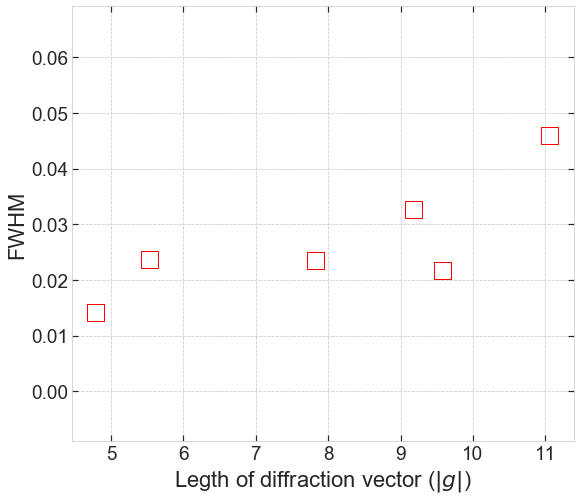

In [60]:
fig, axes = plt.subplots(figsize=(9,8))

axislabelsize = 22
axisticksize = 19

scattersize = 17**2

axes.scatter(g, FWHM,
             s=scattersize,
             marker='s', color='red', facecolors='none')

axes.set_xlabel('Legth of diffraction vector ($|g|$)', fontsize=axislabelsize)
axes.set_ylabel('FWHM', fontsize=axislabelsize)
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

plt.savefig(figsave_dir +
            'williamson_hall.' + figsave_format,
            format=figsave_format,
            dpi=figsave_dpi)

plt.show()

#### Modified Williamson-Hall figure

In [63]:
# Fit 2nd order polynoms
z_edge, cov_edge = np.polyfit(mod_WH_edge, FWHM, 2, cov=True)
perr_edge = np.sqrt(np.diag(cov_edge))

z_screw, cov_screw = np.polyfit(mod_WH_screw, FWHM, 2, cov=True)
perr_screw = np.sqrt(np.diag(cov_screw))

z_mixed, cov_mixed = np.polyfit(mod_WH_mixed, FWHM, 2, cov=True)
perr_mixed = np.sqrt(np.diag(cov_mixed))
# -------------------------------------------
z_values = [z_edge, z_screw, z_mixed]
perr_values = [perr_edge, perr_screw, perr_mixed]

In [64]:
def plot_polyfit(arr, z):
    new_arr = np.zeros(len(arr))
    
    for idx, p in enumerate(arr):
        for rank in range(len(z)):
            new_arr[idx] += z[-rank-1] * p**rank
    return new_arr

In [66]:
disloc_types = ['edge', 'screw', 'mixed']
disloc_labels = [
    'Edge disloc. only',
    'Screw disloc. only',
    'Mixed dislocations'
]
disloc_colors = ['tab:red', 'tab:blue', 'tab:green']

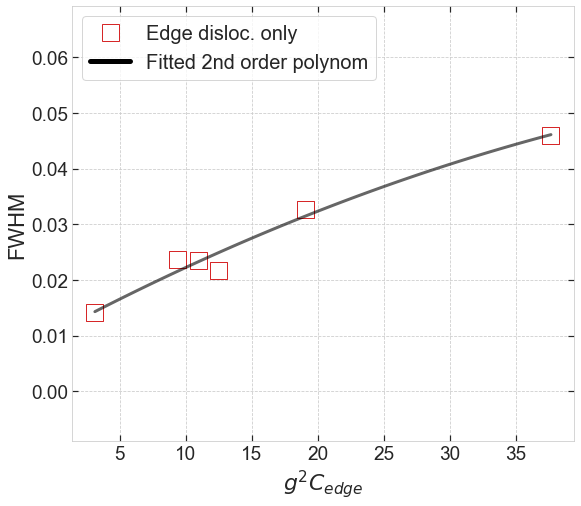

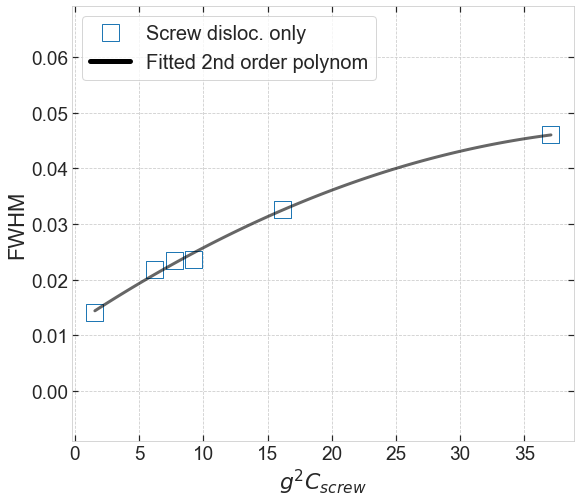

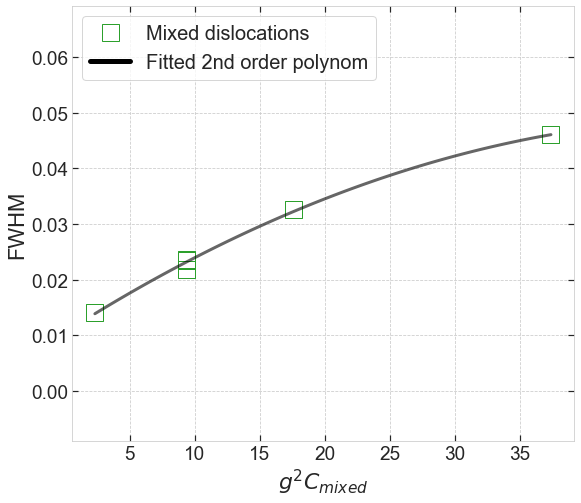

In [74]:
nrows = 1
ncols = 1

axislabelsize = 22
axisticksize = 19
legendsize = 20
scattersize = 17**2

for i in range(3):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*9, nrows*8))

    axes.scatter(mod_WH_values[i], FWHM,
                 label=disloc_labels[i], s=scattersize,
                 marker='s', color=disloc_colors[i], facecolors='none')
    axes.plot(np.linspace(min(mod_WH_values[i]),max(mod_WH_values[i]),100),
              plot_polyfit(arr=np.linspace(min(mod_WH_values[i]),max(mod_WH_values[i]),100), z=z_values[i]),
              color='k', lw=3, alpha=0.6)

    # Handles for subplot legends
    handles = [Line2D([0], [0], marker='s', color='white', markeredgecolor=disloc_colors[i],
                      markersize=17, label=disloc_labels[i]),
               Line2D([0], [0], color='black', lw=5, label='Fitted 2nd order polynom')]
    axes.legend(handles=handles, loc='upper left', fontsize=legendsize)

    axes.set_xlabel('$g^2 C_{%s}$' % disloc_types[i], fontsize=axislabelsize)
    axes.set_ylabel('FWHM', fontsize=axislabelsize)
    axes.tick_params(axis='both', which='major', labelsize=axisticksize)

    plt.savefig(figsave_dir +
                'williamson_hall_modified_{0}.'.format(disloc_types[i]) + figsave_format,
                format=figsave_format,
                dpi=figsave_dpi)

    plt.show()

## CMWP method

In [78]:
dat_4_cmwp = np.genfromtxt(data_dir + '4.int.4.dat')

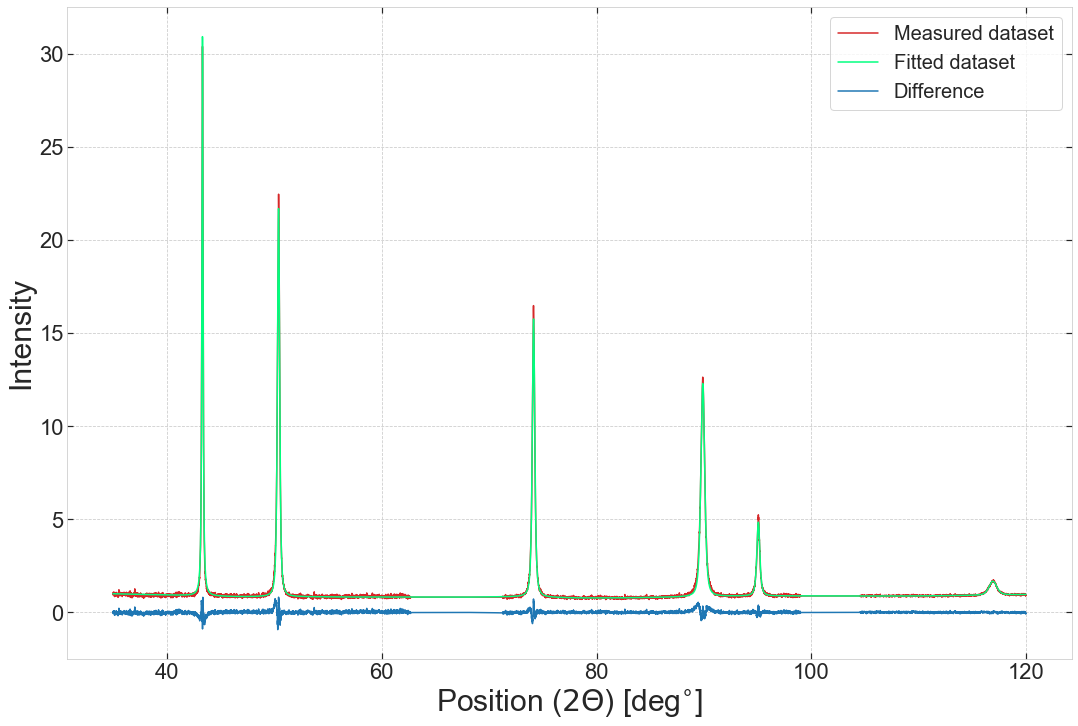

In [85]:
fig, axes = plt.subplots(figsize=(18,12))

axislabelsize = 30
axisticksize = 22
legendsize = 20

axes.plot(dat_4_cmwp[:,0], dat_4_cmwp[:,1],
          color='tab:red', label='Measured dataset')
axes.plot(dat_4_cmwp[:,0], dat_4_cmwp[:,2],
          color='springgreen', label='Fitted dataset')
axes.plot(dat_4_cmwp[:,0], dat_4_cmwp[:,3],
          color='tab:blue', label='Difference')

axes.set_xlabel('Position ($2 \Theta$) [deg$^{\circ}$]', fontsize=axislabelsize)#, fontweight='bold')
axes.set_ylabel('Intensity', fontsize=axislabelsize)#, fontweight='bold')

axes.tick_params(axis='both', which='major', labelsize=axisticksize)

plt.legend(loc='upper right', fontsize=legendsize)

plt.savefig(figsave_dir +
            'CMWP_fit.' + figsave_format,
            format=figsave_format,
            dpi=figsave_dpi)
plt.show()

In [2]:
%%cmd
type ..\data\4.sol

Microsoft Windows [Version 10.0.18362.476]
(c) 2019 Microsoft Corporation. Minden jog fenntartva.

C:\Users\masterdesky\Documents\GitHub\ELTE_Applied_Physics_2019\VI. X-ray line profile analysis\notebooks>type ..\data\4.sol
This is CMWP-fit, a program for evaluation of diffraction patterns
using the method of Convolutional Multiple Whole Profile fitting.
Copyright (C) Gábor Ribárik and Tamás Ungár 1998-2008. All rights reserved.
For permission to use, copy, modify this program or any of its components,
see the file CMWP_COPYRIGHT.
(C)MWP version number: 180502.

Date: 2019-11-21 10:49:24

Data file: data/MSc_labor/4.dat

The value of the lattice constant (in nm): 0.3615
The absolute value of the Burgers vector (in nm): 0.2556
The average contrast factor of the h00 reflections: 0.30525
The wavelength is: 0.15406 nm.
Using the spherical size function.
Found peak at 43.3011504420536, intensity=29.3842, phase=0.
hkl=111
H2=0.333333
g^2=22.9564
K=4.79128
ANX=0.333333
Found peak at 50.387020